In [2]:
# imports
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [169]:
var=1
resnames=[]
restypes=[]
list_revs=[]
list_price=[]
star_fin=[]

#Loop through 10 pages of recommended restaurants in the London area
while var < 100:
    print(var)
    url='https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=' +str(var)
    print(url)
    req = requests.get(url)
    scraper= BeautifulSoup(req.text)
    
#From the scraper extract the type of restaurant
    restype=scraper.find_all('a', {'class':'lemon--a__09f24__IEZFH',
                               'class':'link__09f24__1kwXV',
                               'class':'link-color--inherit__09f24__3PYlA',
                               'class':'link-size--default__09f24__3xWLF'})
    restype=[str(item) for item in restype]
    restype=[ item.replace('</a',"") for item in restype]

    n=0
    while n <len(restype):
        if '<img alt=' in restype[n]:
            if 'Restaurants&amp' in restype[n+1]:
                resnames.append(restype[n].split('class')[1].split('alt=')[1])
                restypes.append(restype[n+1].split('>')[1])

        n+=1
 # Extract the number of reviews and price range

    revprice=scraper.find_all('span', {'class': 'lemon--span__09f24__3997G',
                               'class':'text__09f24__2tZKC'})
    revprice= [str(item) for item in revprice]
    revprice=[item.replace('</span>', "") for item in revprice]
    revprice= [item.split('>')[1] for item in revprice]
    maxnum=len(revprice)
   
    n=0
    while n < maxnum:
        if revprice[n].isdigit() and '£' in revprice[n+1]:
            list_revs.append(revprice[n])
            list_price.append(revprice[n+1])
            n=n+2
            
        elif revprice[n].isdigit() and '£' not in revprice[n+1]:
            list_price.append('Missing')
            list_revs.append(revprice[n])
            n=n+1
        elif '£' in revprice[n] and '£' in revprice[n+1]:
            n=n+1
            continue
           
        else:
            n+=1
            continue
            
# Extract the number of stars          
    stars=scraper.find_all('div', {'class': 'lemon--div__09f24__1mboc',
                                'class': 'i-stars__09f24__1T6rz',
                                'class': 'i-stars--regular-4__09f24__2YrSK',
                               'class': ' border-color--default__09f24__R1nRO',
                                'class': 'overflow--hidden__09f24__3u-sw'})
    stars= [str(item) for item in stars]
   
    stars_r=[star.split('aria-label=')[-1] for star in stars]
    stars_r=[star.split('class')[0] for star in stars_r]
    stars_r= [star for star in stars_r if 'div' not in star]
    stars_r= [star.replace("\"", "") for star in stars_r if 'div' not in star]
    star_fin.append(stars_r)
    
    var=var+10
    
star_fin=[star for item in star_fin for star in item]
restypes=[item.replace(' &amp; ', "&") for item in restypes]
resnames=[item.replace(' &amp; ', "&") for item in resnames]


1
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=1
11
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=11
21
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=21
31
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=31
41
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=41
51
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=51
61
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=61
71
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=71
81
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=81
91
https://www.yelp.co.uk/search?find_desc=Restaurants&find_loc=London&ns=1&start=91


In [232]:
df.to_csv(r"C:\Users\escag\ESProjects\WebScraping\df_yelp2_100.csv")

In [174]:
star_fin=[star.replace(' star rating', "") for star in star_fin]

In [196]:
#Construct the DataFrame 
df_dict = {
    'Name': resnames,
    'Type': restypes,
    'PriceRange': list_price,
    'Stars' : star_fin,
    'Reviews' : list_revs
}

df = pd.DataFrame(df_dict)

In [197]:

df

,Name,Type,PriceRange,Stars,Reviews
0,"""Dishoom""",Indian,££,4.5,1841
1,"""Mother Mash""",British,££,4,468
2,"""Flat Iron""",Steakhouses,££,4.5,380
3,"""The Golden Chippy""",Fish&Chips,££,5,108
4,"""Ffiona’s Restaurant""",British,££,4.5,269
...,...,...,...,...,...
95,"""Battersea Pie""",British,£,4,82
96,"""Shake Shuka""",Lebanese,£,4.5,20
97,"""Banh Mi Town""",Vietnamese,Missing,4,9
98,"""Busaba Soho""",Thai,££,4,381


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        100 non-null    object
 1   Type        100 non-null    object
 2   PriceRange  100 non-null    object
 3   Stars       100 non-null    object
 4   Reviews     100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [199]:
df.Stars=df.Stars.astype('float')
df.Reviews=df.Reviews.astype('int16')

## Data Analysis & Visualization

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [200]:
count_type=df.groupby(by='Type')[['Type']].count()

In [201]:
count_type.rename({'Type': 'TypeFreq'}, axis=1, inplace=True)
count_type.reset_index(inplace=True)

In [202]:
df=df.merge(count_type, on ='Type')

In [203]:
df

,Name,Type,PriceRange,Stars,Reviews,TypeFreq
0,"""Dishoom""",Indian,££,4.5,1841,4
1,"""Dishoom""",Indian,££,4.5,545,4
2,"""Roti Chai""",Indian,££,4.0,297,4
3,"""Dishoom""",Indian,££,4.5,492,4
4,"""Mother Mash""",British,££,4.0,468,17
...,...,...,...,...,...,...
95,"""Xi’An BiangBiang Noodles""",Noodles,Missing,4.0,16,1
96,"""Greenberry Café""",Brasserie,££,4.0,32,2
97,"""Fego""",Brasserie,££,4.0,13,2
98,"""Hoppers""",Sri Lankan,££,4.5,113,1


In [204]:
df['PriceRangeNum']=df.PriceRange.replace({"£":1, "££":2, "£££":3, "££££":4, "£££££":5, 'Missing':None})

In [205]:
df

,Name,Type,PriceRange,Stars,Reviews,TypeFreq,PriceRangeNum
0,"""Dishoom""",Indian,££,4.5,1841,4,2.0
1,"""Dishoom""",Indian,££,4.5,545,4,2.0
2,"""Roti Chai""",Indian,££,4.0,297,4,2.0
3,"""Dishoom""",Indian,££,4.5,492,4,2.0
4,"""Mother Mash""",British,££,4.0,468,17,2.0
...,...,...,...,...,...,...,...
95,"""Xi’An BiangBiang Noodles""",Noodles,Missing,4.0,16,1,NaN
96,"""Greenberry Café""",Brasserie,££,4.0,32,2,2.0
97,"""Fego""",Brasserie,££,4.0,13,2,2.0
98,"""Hoppers""",Sri Lankan,££,4.5,113,1,2.0


In [216]:
df['TypeRed']=df['Type']
df['TypeRed'].loc[(df['TypeFreq'] < 3)] = 'Other'

In [214]:
df

,Name,Type,PriceRange,Stars,Reviews,TypeFreq,PriceRangeNum,TypeRed
0,"""Dishoom""",Indian,££,4.5,1841,4,2.0,Other
1,"""Dishoom""",Indian,££,4.5,545,4,2.0,Other
2,"""Roti Chai""",Indian,££,4.0,297,4,2.0,Other
3,"""Dishoom""",Indian,££,4.5,492,4,2.0,Other
4,"""Mother Mash""",British,££,4.0,468,17,2.0,British
...,...,...,...,...,...,...,...,...
95,"""Xi’An BiangBiang Noodles""",Noodles,Missing,4.0,16,1,NaN,Other
96,"""Greenberry Café""",Brasserie,££,4.0,32,2,2.0,Other
97,"""Fego""",Brasserie,££,4.0,13,2,2.0,Other
98,"""Hoppers""",Sri Lankan,££,4.5,113,1,2.0,Other


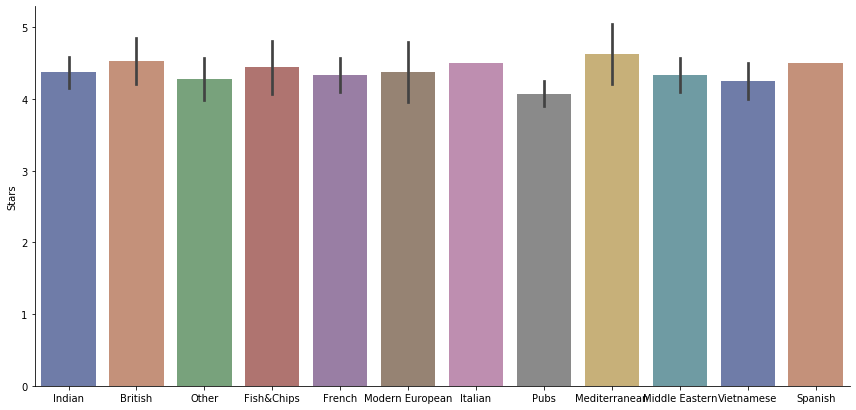

In [9]:
g = sns.catplot(
    data=df, kind="bar",
    x="TypeRed", y="Stars",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)
#g.despine(left=True)
g.set_axis_labels("", "Stars")


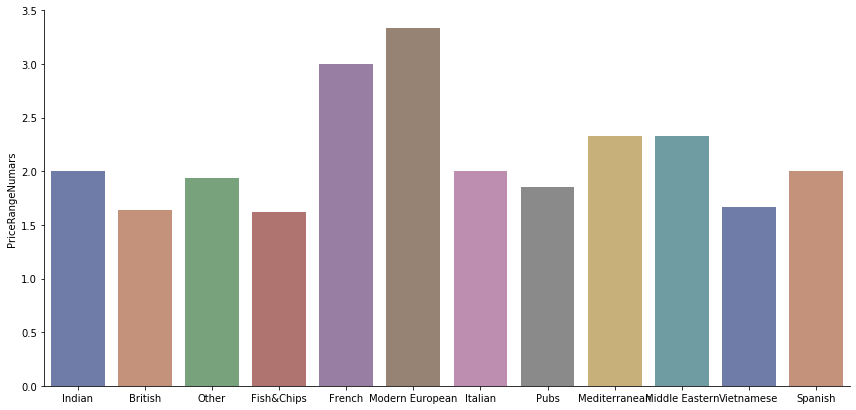

In [236]:
g = sns.catplot(
    data=df, kind="bar",
    x="TypeRed", y="PriceRangeNum",
    ci=None, palette="dark", alpha=.6, height=6,aspect=2
)
#g.despine(left=True)
g.set_axis_labels("", "PriceRangeNumars")


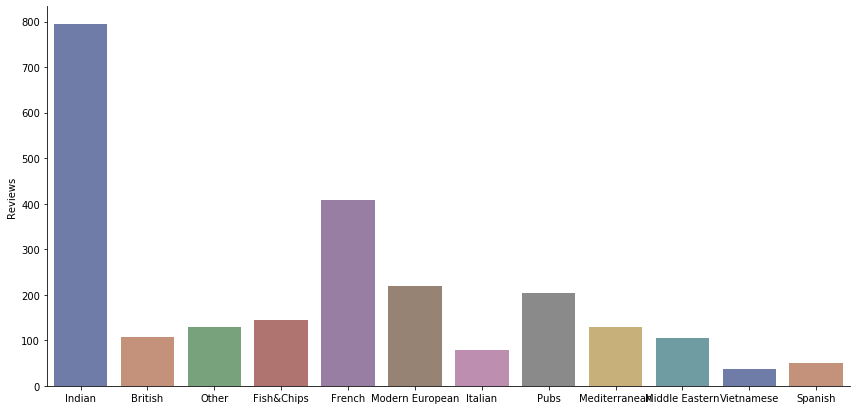

In [10]:
g = sns.catplot(
    data=df, kind="bar",
    x="TypeRed", y="Reviews",
    ci=None, palette="dark", alpha=.6, height=6, aspect=2
)
#g.despine(left=True)
g.set_axis_labels("", "Reviews")


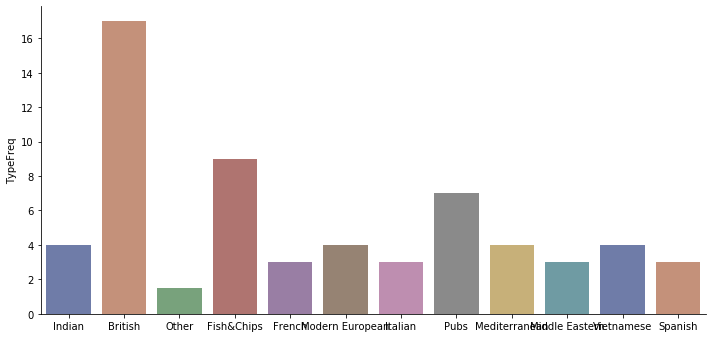

In [230]:
g = sns.catplot(
    data=df, kind="bar",
    x="TypeRed", y="TypeFreq",
    ci=None, palette="dark", alpha=.6, height=5, aspect=2
)
#g.despine(left=True)
g.set_axis_labels("", "TypeFreq")

In [237]:
df.describe()

,Stars,Reviews,TypeFreq,PriceRangeNum
count,100.000000,100.000000,100.000000,85.000000
mean,4.360000,162.430000,5.780000,1.964706
std,0.326289,236.619981,5.602272,0.625777
min,4.000000,1.000000,1.000000,1.000000
25%,4.000000,23.000000,2.000000,2.000000
50%,4.500000,84.500000,3.000000,2.000000
75%,4.500000,220.000000,9.000000,2.000000
max,5.000000,1841.000000,17.000000,4.000000


In [5]:
df=pd.read_csv(r'C:\Users\escag\ESProjects\WebScraping\df_yelp2_100.csv')

In [6]:
df

,Unnamed: 0,Name,Type,PriceRange,Stars,Reviews,TypeFreq,PriceRangeNum,TypeRed
0,0,"""Dishoom""",Indian,££,4.5,1841,4,2.0,Indian
1,1,"""Dishoom""",Indian,££,4.5,545,4,2.0,Indian
2,2,"""Roti Chai""",Indian,££,4.0,297,4,2.0,Indian
3,3,"""Dishoom""",Indian,££,4.5,492,4,2.0,Indian
4,4,"""Mother Mash""",British,££,4.0,468,17,2.0,British
...,...,...,...,...,...,...,...,...,...
95,95,"""Xi’An BiangBiang Noodles""",Noodles,Missing,4.0,16,1,NaN,Other
96,96,"""Greenberry Café""",Brasserie,££,4.0,32,2,2.0,Other
97,97,"""Fego""",Brasserie,££,4.0,13,2,2.0,Other
98,98,"""Hoppers""",Sri Lankan,££,4.5,113,1,2.0,Other
